# CSMODEL Project - Netflix Userbase Dataset Case Study

### Group 8
CAPAROS, MIGUEL ANTONIO <br> 
FERRER, ANGEL JUNE <br>
MARTINEZ, AZELIAH <br>
VILLANUEVA, KEISHA LEIGH <br>

# I. Dataset Description

In this section of the notebook, we provide a comprehensive overview of the dataset used for our analysis. The dataset chosen for this project is the Netflix Userbase Dataset, which provides a synthetic snapshot of a sample Netflix userbase. 

## Dataset Overview

The Netflix Userbase Dataset represent a broad range of user information which includes various details about user subscriptions, revenue, account details, and activity.

## Data Collection Process

The dataset is synthetically sourced, meaning it is generated to mimic real-world data without reflecting actual Netflix user information. This method allows for privacy preservation but also implies that any conclusions drawn from the dataset may not accurately reflect real-world user behavior or trends.

## Dataset File Structure

Each row in the dataset represents a unique user while each column contain various details about the user. The dataset contains a total of 2500 observations (rows) and 10 variables (columns). Each variable provides specific details about the users, enabling analysis of subscription patterns, revenue generation, and user behavior.

***If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.***
*to be answered if ever*

## Dataset Variables

The dataset contains 10 variables, each representing different user information such as:

| Variable             | Description                                                                                   |
|--------------------|-----------------------------------------------------------------------------------------------|
| User ID            | A unique identifier for each user.                                                             |
| Subscription Type  | The type of subscription the user has (basic, standard, or premium).                            |
| Monthly Revenue    | The monthly revenue generated from the user's subscription.                                     |
| Join Date          | The date the user joined Netflix.                                                              |
| Last Payment Date  | The date of the user's last payment.                                                          |
| Country            | The country where the user is located.                                                         |
| Age                | The age of the user.                                                                           |
| Gender             | The gender of the user.                                                                        |
| Device Type        | The type of device the user primarily uses to access Netflix (e.g., Smart TV, Mobile, Desktop, Tablet). |
| Plan Duration      | The duration of the user's current subscription plan.                                           |


# II. Data Cleaning

In this section of the notebook, we will focus on cleaning the Netflix Userbase Dataset. Data cleaning is an essential step in the data analysis process, aimed at preparing raw data for further exploration and analysis. It involves identifying and correcting errors or inconsistencies in the data, handling missing values, removing duplicates, and ensuring data quality and integrity.

## Import Libraries

We begin by importing **`numpy`** and **`pandas`**, which are essential libraries for data manipulation and analysis in Python. These libraries provide the necessary functions and data structures to begin our data cleaning process. Additionally, we import **`matplotlib.pyplot`** and **`seaborn`** to create and enhance visualizations, which will help us in exploring and presenting our data effectively.


In [1]:
# Data Manipulation 
import numpy as np      # For numerical operations
import pandas as pd     # For data manipulation and analysis

# Visualization
import matplotlib.pyplot as plt     # For creating plots and visualizations
import seaborn as sns               # For enhancing visualizations


## The Dataset

Insert description

## Reading the Dataset

Our first step is to load the dataset using pandas, which will import the data into a pandas `DataFrame`. We use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to accomplish this.

In [2]:
userbase_df = pd.read_csv('Netflix Userbase.csv')

When loading a new dataset, it is advisable to utilize the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, as it displays general information regarding the dataset's structure and attributes.

In [3]:
userbase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


We will use the [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) function to quickly view the first few rows of our dataset.

In [4]:
userbase_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


## Handling Missing Data

Detecting and managing missing values is crucial for data analysis. To identify missing data within our DataFrame, we will use the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) function in combination with [`sum`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html). This approach allows us to understand the extent of missing values in each column, facilitating appropriate strategies for data cleaning and preprocessing.

In [5]:
missing_data = userbase_df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


## Outlier Handling

Insert description

## Feature Engineering

Insert description

## Duplicate Handling

Duplicates in datasets can impact the accuracy of analysis results and should be managed to ensure data integrity. Identifying and managing duplicates is an essential step in data preprocessing. We use the [`duplicated`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function to find rows that are exact duplicates based on specified columns (`subset`). For instance, we will check for duplicates based on 'Country' and 'Subscription Type'. If duplicates are identified (`not duplicate_rows.empty`), they are displayed for further examination. Otherwise, a message indicating no duplicates are found is shown.

This code snippet identifies and prints duplicate rows in the dataset that have the same values in the 'Country' column. The `duplicated()` function with `keep=False` ensures all occurrences of duplicates are highlighted.

In [20]:
# Find duplicated rows based on 'Country' and 'Subscription Type'
duplicate_rows = userbase_df[userbase_df.duplicated(subset=['Country', 'Subscription Type'], keep=False)]

if not duplicate_rows.empty:
    print("\nNumber of duplicated rows:", len(duplicate_rows))

    # Count the number of unique combinations
    unique_combinations = duplicate_rows.groupby(['Country', 'Subscription Type']).size().reset_index(name='Count')

    print("Number of unique combinations:", len(unique_combinations))
    print("\nUnique combinations based on 'Country' and 'Subscription Type':")
    print(unique_combinations)
else:
    print("No duplicate rows found based on 'Country' and 'Subscription Type'.")



Number of duplicated rows: 2500
Number of unique combinations: 27

Unique combinations based on 'Country' and 'Subscription Type':
           Country Subscription Type  Count
0        australia             basic     31
1        australia           premium    101
2        australia          standard     51
3           brazil             basic    146
4           brazil           premium     33
5           brazil          standard      4
6           canada             basic    145
7           canada           premium     88
8           canada          standard     84
9           france             basic     36
10          france           premium    147
11         germany             basic    149
12         germany           premium      3
13         germany          standard     31
14           italy             basic    176
15           italy           premium      4
16           italy          standard      3
17          mexico             basic      4
18          mexico          stan

## Handling Inconsistent Formatting

Inconsistent formatting in a dataset can cause errors in analysis and lead to misinterpreted results. Different representations of the same data, such as variations in text case ('United States', 'united States', 'UNITED STATES') or inconsistent date formats, can be mistakenly treated as different values. This can distort analysis outcomes and produce inaccurate conclusions. By standardizing data formats, we ensure uniformity, which allows for accurate comparisons and aggregations. This consistency is essential for reliable data analysis and modeling.

To address this, let's standardize the 'Country' and 'Subscription Type' columns to lowercase. Using [`str.lower`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lower.html) function, it converts all entries in the 'Country' and 'Subscription Type' columns to lowercase, ensuring consistency. The [`unique`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) function is then used to display all unique values in the column after the transformation, allowing us to verify that the standardization was successful.

In [21]:
userbase_df['Country'] = userbase_df['Country'].str.lower()
userbase_df['Subscription Type'] = userbase_df['Subscription Type'].str.lower()


print("Unique values after converting 'Country' to lowercase:")
print(userbase_df['Country'].unique())
print("\n")

print("Unique values after converting 'Subscription Type' to lowercase:")
print(userbase_df['Subscription Type'].unique())
print("\n")

Unique values after converting 'Country' to lowercase:
['united states' 'canada' 'united kingdom' 'australia' 'germany' 'france'
 'brazil' 'mexico' 'spain' 'italy']


Unique values after converting 'Subscription Type' to lowercase:
['basic' 'premium' 'standard']




# III. Exploratory Data Analysis

In this section of the notebook, we aim to explore and understand various aspects of the Netflix Userbase Dataset through exploratory data analysis. 

This analysis provides comprehensive statistical summaries for both numerical and categorical features within the Netflix userbase dataset. It highlights key metrics such as mean, median, and standard deviation for numerical variables, alongside insights into the distribution and frequency of categorical variables, offering a detailed understanding of the dataset's characteristics.

In [6]:
# Describing all the Numerical Features
userbase_df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [7]:
# Describing all the Categorical Features
userbase_df.describe(include=['O'])

,Subscription Type,Join Date,Last Payment Date,Country,Gender,Device,Plan Duration
count,2500,2500,2500,2500,2500,2500,2500
unique,3,300,26,10,2,4,1
top,Basic,05-11-22,28-06-23,United States,Female,Laptop,1 Month
freq,999,33,164,451,1257,636,2500


## Question 1: What is the distribution of subscription types across different countries?

This section provides numerical summaries including measures of central tendency (mean, median) and dispersion (standard deviation), along with counts and percentages for each subscription type in the dataset.

This code calculates the count of each subscription type within each country and displays the results in a tabular format. It uses the [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html) function to group the data by 'Country' and 'Subscription Type', and then counts the occurrences with the size method. The [`resert_index`](https://pandas.pydata.org/docs/reference/api/pandas.Series.reset_index.html) function converts the grouped data back into a DataFrame, naming the new column 'Count'. Finally, it prints the subscription distribution across different countries.

In [22]:
# Group by 'Country' and 'Subscription Type', then count occurrences
subscription_distribution = userbase_df.groupby(['Country', 'Subscription Type']).size()

# Convert to DataFrame for better readability
subscription_distribution = subscription_distribution.reset_index(name='Count')

print("Distribution of Subscription Types across Different Countries:")
print(subscription_distribution)


Distribution of Subscription Types across Different Countries:
           Country Subscription Type  Count
0        australia             basic     31
1        australia           premium    101
2        australia          standard     51
3           brazil             basic    146
4           brazil           premium     33
5           brazil          standard      4
6           canada             basic    145
7           canada           premium     88
8           canada          standard     84
9           france             basic     36
10          france           premium    147
11         germany             basic    149
12         germany           premium      3
13         germany          standard     31
14           italy             basic    176
15           italy           premium      4
16           italy          standard      3
17          mexico             basic      4
18          mexico          standard    179
19           spain             basic    110
20           

This code visualizes the distribution of users across different subscription types in the dataset using a bar plot. It groups the data by 'Country' and 'Subscription Type' with the [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html) method, counts occurrences using [`size`](https://pandas.pydata.org/docs/reference/api/pandas.Series.size.html), and reshapes the data with [`unstack`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unstack.html). The [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) method creates a stacked bar chart, and figure configures the plot size. The plot is customized with [`title`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.title.html), xlabel, ylabel, xticks, and legend to enhance readability. Finally, the plot is displayed, showing the distribution of Basic, Standard, and Premium subscription plans across different countries.

<Figure size 1200x800 with 0 Axes>

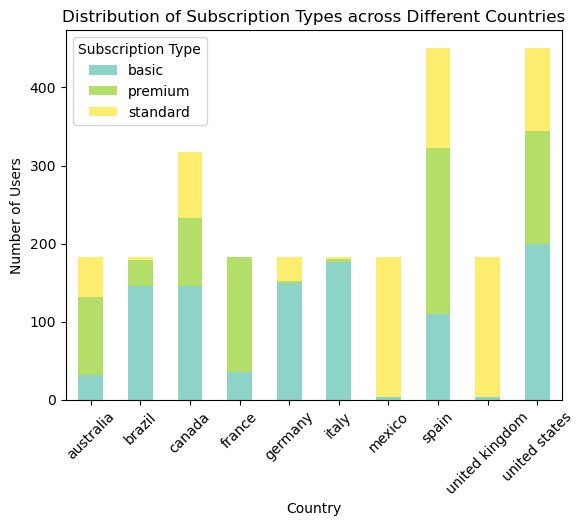

In [16]:
# Grouping data by 'Country' and 'Subscription Type' to get counts
subscription_counts = userbase_df.groupby(['Country', 'Subscription Type']).size().unstack()

# Plotting the grouped bar plot
plt.figure(figsize=(12, 8))
subscription_counts.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Distribution of Subscription Types across Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.show()

## Question 2: How does the average monthly revenue vary for each subscription type across different countries?

This section provides numerical summaries, including measures of central tendency (mean, median) and dispersion (standard deviation) of monthly revenue for each subscription type across different countries. Additionally, it features appropriate visualizations to effectively showcase the findings.

This code calculates the mean, median, and standard deviation of monthly revenue for each subscription type within each country. It uses the [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html) function to group the data by 'Country' and 'Subscription Type', and then applies the [`agg`](https://pandas.pydata.org/docs/reference/api/pandas.Series.agg.html) function to compute the statistical measures (mean, median, std) for the 'Monthly Revenue' column. The results are stored in a new DataFrame named revenue_stats, which is reset using [`resert_index`](https://pandas.pydata.org/docs/reference/api/pandas.Series.reset_index.html) for better readability.

In [23]:
# Group by 'Country' and 'Subscription Type', then calculate mean, median, and standard deviation for Monthly Revenue
revenue_stats = userbase_df.groupby(['Country', 'Subscription Type'])['Monthly Revenue'].agg(['mean', 'median', 'std']).reset_index()

print("Measures of Central Tendency and Dispersion for Monthly Revenue by Subscription Type across Different Countries:")
print(revenue_stats)


Measures of Central Tendency and Dispersion for Monthly Revenue by Subscription Type across Different Countries:
           Country Subscription Type       mean  median       std
0        australia             basic  12.193548    12.0  1.759154
1        australia           premium  12.415842    12.0  1.716201
2        australia          standard  12.529412    12.0  1.591891
3           brazil             basic  12.493151    13.0  1.727053
4           brazil           premium  12.424242    12.0  1.677616
5           brazil          standard  12.750000    13.0  1.500000
6           canada             basic  12.524138    12.0  1.671172
7           canada           premium  12.340909    12.0  1.639220
8           canada          standard  12.476190    12.0  1.631587
9           france             basic  12.361111    12.0  1.457057
10          france           premium  12.666667    13.0  1.713497
11         germany             basic  12.302013    12.0  1.630390
12         germany           

This code features a stacked bar plot visualizing the average monthly revenue for each subscription type across different countries. It utilizes the  `revenue_stats` DataFrame, which aggregates data by 'Country' and 'Subscription Type' to calculate mean values for 'Monthly Revenue'. The [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) function is used with `kind='bar'` and `stacked=True` parameters to create a stacked bar chart. The data is then reshaped using [`pivot`](https://pandas.pydata.org/docs/reference/api/pandas.Series.pivot.html) to set 'Country' as the index, 'Subscription Type' as columns, and 'mean' as the values. This visualization effectively compares revenue patterns among different subscription types across multiple countries.

<Figure size 1200x800 with 0 Axes>

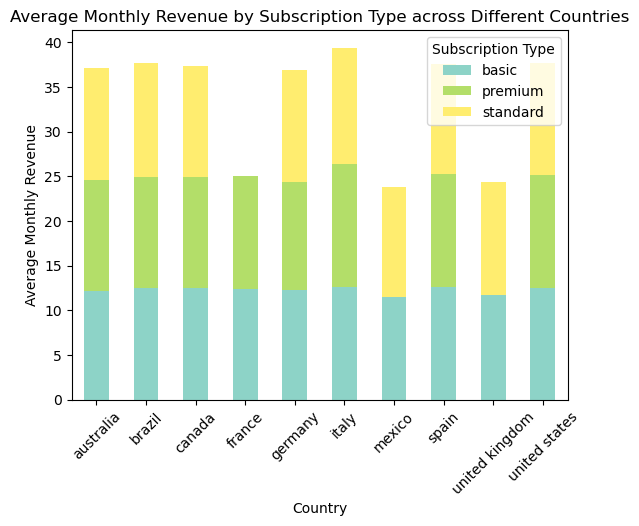

In [29]:
# Plotting the grouped bar plot for average monthly revenue by subscription type across different countries
plt.figure(figsize=(12, 8))
revenue_stats.pivot(index='Country', columns='Subscription Type', values='mean').plot(kind='bar', stacked=True, colormap='Set3')

plt.title('Average Monthly Revenue by Subscription Type across Different Countries')
plt.xlabel('Country')
plt.ylabel('Average Monthly Revenue')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.show()

## Question 3: Are there significant differences in subscription type preferences between countries with diverse demographics (e.g., age, gender, country)?

insert numerical summaries description

In [ ]:
# insert code

insert visualization description

In [ ]:
# insert code

## Question 4: Can we identify any clusters of countries based on similar patterns of subscription type preferences?

insert numerical summaries description

In [ ]:
# insert code

insert visualization description

In [ ]:
# insert code

# IV. Research 

In this section of the notebook, the research question drives the focus of our data analysis project and should emerge from insights gained during exploratory data analysis (EDA).

<div style="text-align: center;"><strong><em>Are there any patterns in subscription type preferences based on country?</em></strong></div>

This research question examines whether distinct patterns exist in Netflix subscription type preferences (Basic, Standard, Premium) across different countries. Understanding these patterns is crucial for Netflix to tailor its content offerings and subscription plans according to regional preferences, potentially improving user satisfaction and retention. By uncovering significant insights from exploratory data analysis (EDA) of the Netflix userbase dataset, this study aims to provide actionable recommendations for strategic decision-making in global market expansion and customer engagement strategies. Through this analysis, we seek to reveal regional trends in subscription choices, offering valuable insights into user behavior across diverse countries.